# Team

<a target="_blank" href="https://colab.research.google.com/drive/1iuP5kw92Qa48QMUJW-K50r-pSouXYgD-?usp=sharing"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Helder Mateus dos Reis Matos

Code the Mantegna Algorithm (described in the course material and in chapter 3 of the book Nature-Inspired Optimization Algorithms by Xin-She Yang) to generate the motion of a particle based on Levy Flights.

Starting from position (0,0), the result of the algorithm should display a 2D graph showing the trajectory of the particle's motion. You should just show the final figure, not the intermediary steps. Investigate the impact of the beta parameter on the particle's behavior and relate your observations in your submission.

Your code can be created in Python and must be submitted in SIGAA.

# Mantegna Algorithm

In [1]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt

## 1. Generation of a direction

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f"Point({self.x}, {self.y})"

points = [Point(0, 0)]

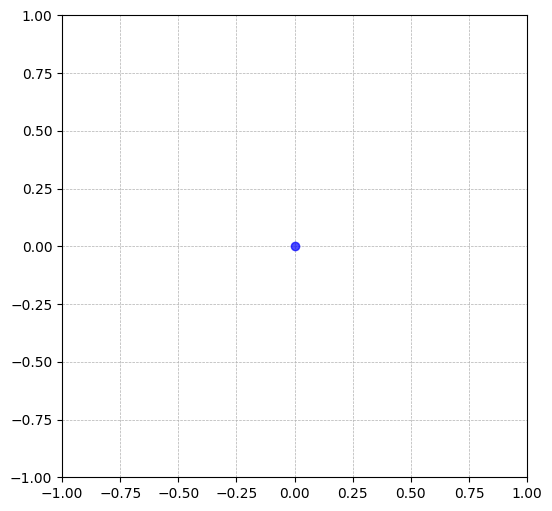

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
for p in points:
    plt.plot(p.x, p.y, 'o', color="blue", alpha=0.7)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

In [4]:
def slope_equation(p1, p2):
    if p2.x - p1.x == 0:
        return float('inf')
    return (p2.y - p1.y) / (p2.x - p1.x)

def point_slope_equation(m, p, x):
    return m * (x - p.x) + p.y

In [5]:
aux_point = Point(np.random.uniform(-1, 1), np.random.uniform(-1, 1))
aux_point

Point(0.8556650654483609, -0.29795377692210834)

In [6]:
slope = slope_equation(points[-1], aux_point)
slope

-0.3482130905577911

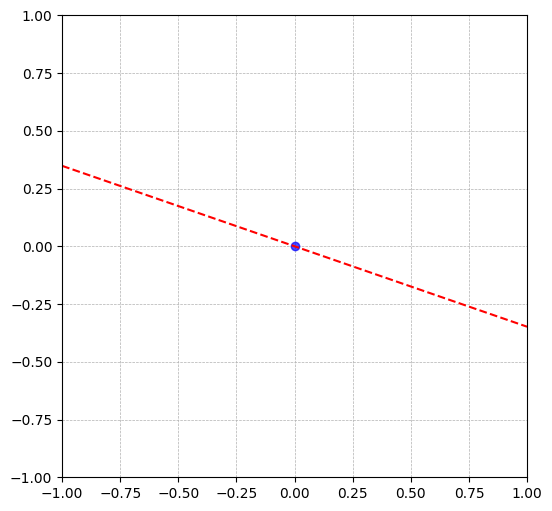

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
for p in points:
    plt.plot(p.x, p.y, 'o', color="blue", alpha=0.7)
plt.plot([-1, 1], [point_slope_equation(slope, points[-1], -1), point_slope_equation(slope, points[-1], 1)], color="red", linestyle="--")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

## 2. Generation of steps that obey the stable distribution

In [8]:
beta = 1/2

In [9]:
num = np.random.gamma(1 + beta) * np.sin(np.pi * beta / 2)
den = np.random.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
sigma_u = (num / den)**(1 / beta)

In [10]:
sigma_v = 1

In [11]:
u = np.random.normal(0, sigma_u)
v = np.random.normal(0, sigma_v)

In [12]:
s = u / abs(v) ** (1 / beta)
s

-0.4141942832625229

In [13]:
new_point = Point(
    points[-1].x + s * (1 / np.sqrt(1 + slope ** 2)),
    points[-1].y + s * (slope / np.sqrt(1 + slope ** 2))
)
new_point

Point(-0.39115817936694636, 0.1362063985343232)

In [14]:
points = points + [new_point]
points

[Point(0, 0), Point(-0.39115817936694636, 0.1362063985343232)]

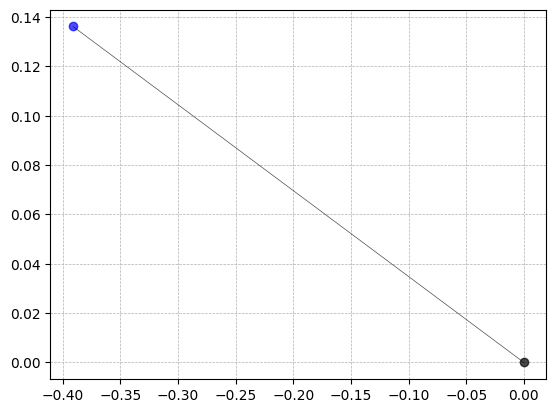

In [15]:
fig, ax = plt.subplots()
for i, p in enumerate(points):
    if i == 0:
        plt.plot(p.x, p.y, 'o', color="black", alpha=0.7)
    else:
        plt.plot(p.x, p.y, 'o', color="blue", alpha=0.7)
        plt.plot([points[i-1].x, p.x], [points[i-1].y, p.y], color="black", alpha=0.7, linewidth=0.5)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

## 3. Complete algorithm

In [16]:
from scipy.special import gamma
import math

In [17]:
class Levy:
    def __init__(self, beta: float = 1/2, initial_point=Point(0, 0)):
        self.beta = beta
        self.points = [initial_point]

    def slope_equation(self, p1, p2):
        if p2.x - p1.x == 0:
            return float('inf')
        return (p2.y - p1.y) / (p2.x - p1.x)
    
    def point_slope_equation(self, m, p, x):
        return m * (x - p.x) + p.y
    
    def step(self, p, p_aux):
        m = self.slope_equation(p, p_aux)

        num = gamma(1 + self.beta) * np.sin(np.pi * self.beta / 2)
        den = gamma((1 + self.beta) / 2) * self.beta * 2 ** ((self.beta - 1) / 2)

        sigma_u = (num / den)**(1 / self.beta)
        sigma_v = 1

        u = np.random.normal(0, sigma_u)
        v = np.random.normal(0, sigma_v)
        s = u / abs(v) ** (1 / self.beta)

        if math.isinf(m):
            sign = np.sign(p_aux.y - p.y) or 1.0
            dx = 0.0
            dy = sign
        else:
            norm = math.sqrt(1 + m ** 2)
            dx = 1.0 / norm
            dy = m / norm

        new_point = Point(
            p.x + s * dx,
            p.y + s * dy
        )

        # new_point = Point(
        #     self.points[-1].x + s * (1 / np.sqrt(1 + m ** 2)),
        #     self.points[-1].y + s * (m / np.sqrt(1 + m ** 2))
        # )
        return new_point
    
    def generate(self, n_steps):
        for _ in range(n_steps):
            last = self.points[-1]
            aux_point = Point(np.random.uniform(last.x-1, last.x+1), np.random.uniform(last.y-1, last.y+1))
            new_point = self.step(last, aux_point)
            self.points.append(new_point)
        return self.points
    
    def plot(self, figsize: List[float] = [6, 6]):
        fig, ax = plt.subplots(figsize=figsize)
        for i, p in enumerate(self.points):
            if i == 0:
                plt.plot(p.x, p.y, 'o', color="black", alpha=0.7)
                plt.text(p.x, p.y, f"origem", verticalalignment='bottom', horizontalalignment='left', fontsize=8)
            else:
                plt.plot(p.x, p.y, 'x', color="blue", alpha=0.7)
                plt.plot([self.points[i-1].x, p.x], [self.points[i-1].y, p.y], color="black", alpha=0.7, linewidth=0.5)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

        return fig, ax

(<Figure size 600x600 with 1 Axes>, <Axes: >)

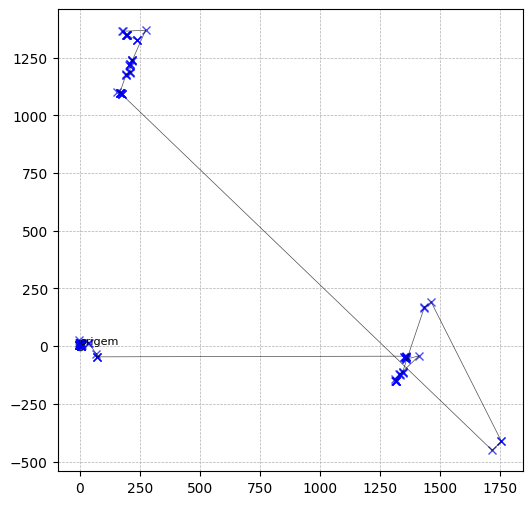

In [19]:
levy = Levy()

levy.generate(n_steps=100)

levy.plot()

# Impact of the beta parameter

In [33]:
betas = np.linspace(0.1, 2, 20)
betas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

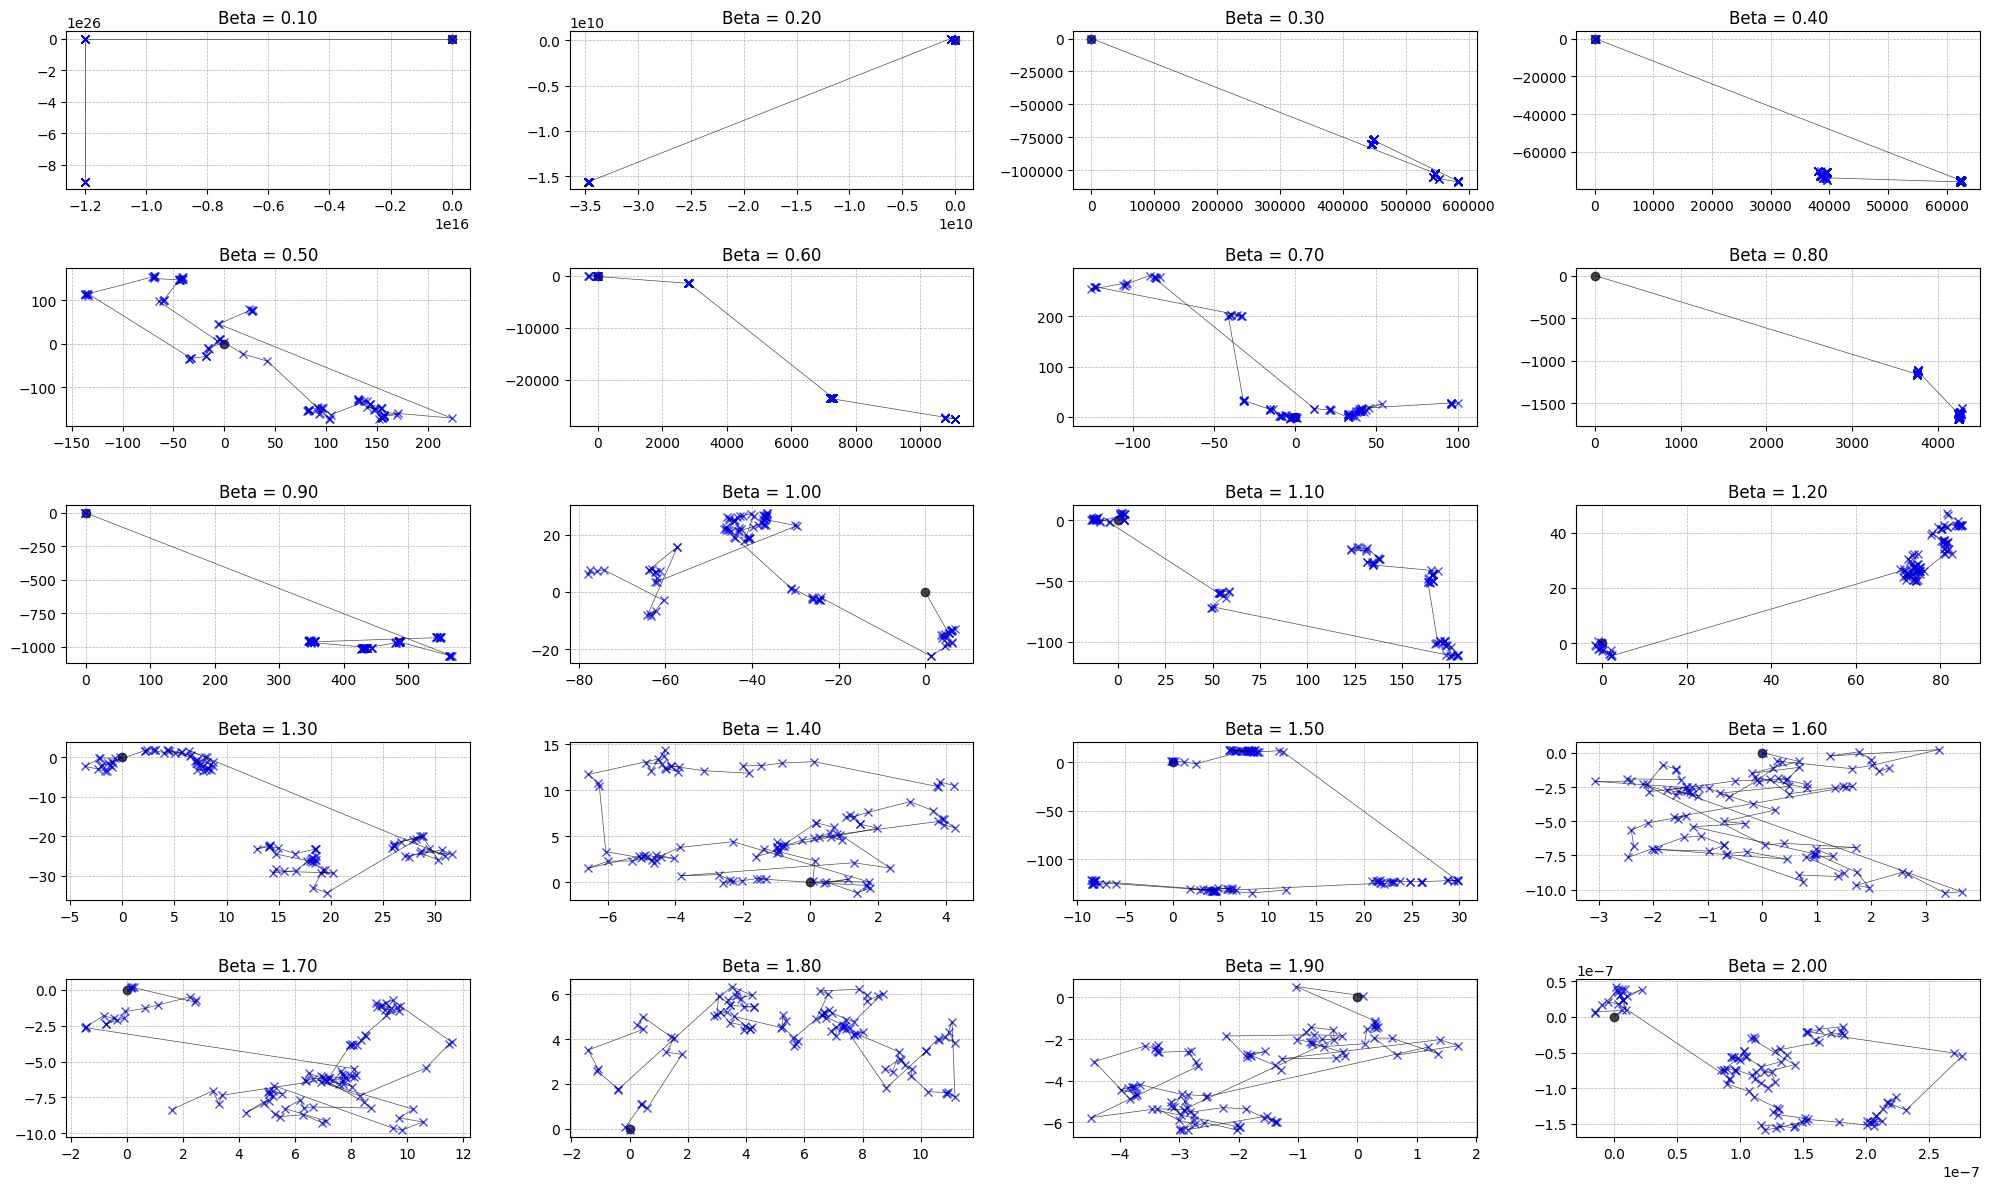

In [35]:
fig, ax = plt.subplots(5, 4, figsize=(20, 12))

for i, beta in enumerate(betas):
    levy = Levy(beta=beta)
    levy.generate(n_steps=100)
    row = i // 4
    col = i % 4
    ax[row, col].set_title(f"Beta = {beta:.2f}")
    for j, p in enumerate(levy.points):
        if j == 0:
            ax[row, col].plot(p.x, p.y, 'o', color="black", alpha=0.7)
        else:
            ax[row, col].plot(p.x, p.y, 'x', color="blue", alpha=0.7)
            ax[row, col].plot([levy.points[j-1].x, p.x], [levy.points[j-1].y, p.y], color="black", alpha=0.7, linewidth=0.5)
    ax[row, col].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()